# PROJET QUADRATURE NUMERIQUE (EDO)

### Objectif:

Représentation graphique de la trajectoire dans l'espace de phase.

In [22]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Méthodes numériques de résolution d’équations différentielles

### 1.1 et 1.3 Dans la classe Resolve
Création des méthodes Euler explicite et des methodes de Runge-Kutta d'ordre 2 et 4

Création de la classe Resolve pour résoudre l'équation différentielle.
On utilise la méthode Kutta.

In [23]:
class Resolve:


    def __init__(self, L, a, b, N, k, fct):
        '''

        :param L: Paramètre fix à 1
        :param a: intervalle min
        :param b: intervalle max
        :param N: Nombre d'intervalles
        '''

        if fct == 2:
            self.y0 = [np.pi/2, 0]
        else:
            self.y0 = [0, 0]

        self.a = a
        self.b = b
        self.N = N
        self.fct = fct # 1 = y' = -y + t # 2 fonction pendule

        self.L = L
        self.k = k
        self.h = (self.b - self.a) / self.N # Le Pas
        self.t = np.linspace(a, b, self.N+1)

    def f(self, y):
        '''
        Fonction pendule
        '''

        if self.fct == 2:
            a = y[1]
            b = - (9.81/self.L) * np.sin(y[0]) - (self.k/self.L)*a
        else:
            a = y[1]
            b = -y[0] + self.t

        return np.array([a, b])

    def euler_explicite(self):

        y_n = self.y0
        Y = [self.y0]
        for _ in t[0:-1]:
            y_n = y_n + self.h*self.f(y_n)
            Y.append(y_n)

        return self.t, np.array(Y)


    def kutta2(self):
        '''
        Methode de Runge-Kutta à 2
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for _ in self.t[0:-1]:

            k1 = self.f(y_n)
            k2 = self.f(y_n + (self.h/2)*k1)

            y_n = y_n + (self.h/6)*(k1 + 2*k2) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

    def kutta4(self):
        '''
        Methode de Runge-Kutta à 4
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for _ in self.t[0:-1]:

            k1 = self.f(y_n)
            k2 = self.f(y_n + (self.h/2)*k1)
            k3 = self.f(y_n + (self.h/2)*k2)
            k4 = self.f(y_n + self.h*k3)
            y_n = y_n + (self.h/6)*(k1 + 2*k2 + 2*k3 + k4) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

### 1.2 Problème de Cauchy

1) $\textit{y' = -y + t avec y(0)=0}$  sur l'intervalle [0, 2]

In [25]:
N = 100
a = 0
b = 2
step = 0.4 # h=0.4

plt.figure(figsize=(5, 5))
for k in np.arange(0.1, 1, step):
    res = Resolve(None, a, b, N, None, 1)
    t, Y = res.euler_explicite()
    plt.plot(Y[:, 1], Y[:, 0])

plt.show()

C:\Users\IOAPO\AppData\Local\Temp/ipykernel_9888/527287326.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([a, b])


ValueError: operands could not be broadcast together with shapes (2,) (2,101) 

<Figure size 360x360 with 0 Axes>

On plot $\theta'$ en fonction de  $\theta$

# 2. Problème du pendule simple

### 2.1 Pas h de 0.4

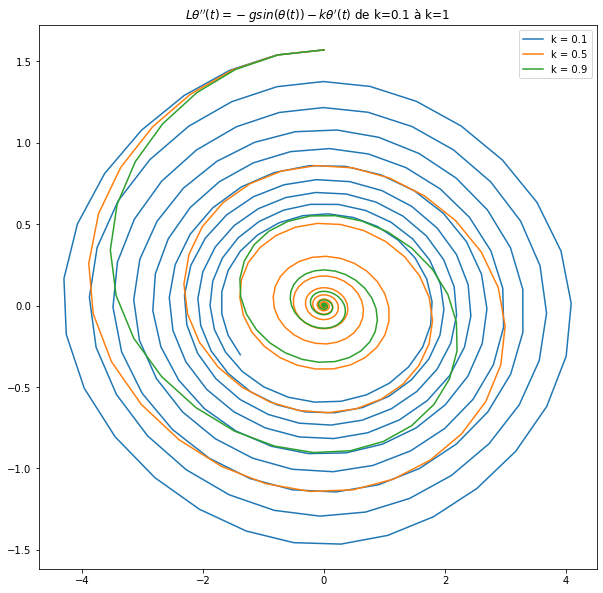

In [26]:
plt.figure(figsize=(10, 10))
for k in np.arange(0.1, 1, step):
    res = Resolve(1, 0, 20, 250, k, 2)
    t, Y = res.kutta4()
    plt.plot(Y[:, 1], Y[:, 0], label=f"k = {k}")

plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
for k in np.arange(0.1, 1, step):
    res = Resolve(1, 0, 20, 250, k, 2)
    t, Y = res.kutta2()
    plt.plot(Y[:, 1], Y[:, 0], label=f"k = {k}")

plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()